# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

In [2]:
cd CV-HW/lesson_9/data/

/content/CV-HW/lesson_9/data


### Step 0

Run the necessary imports.



In [3]:
import cv2
import numpy as np
import dlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).


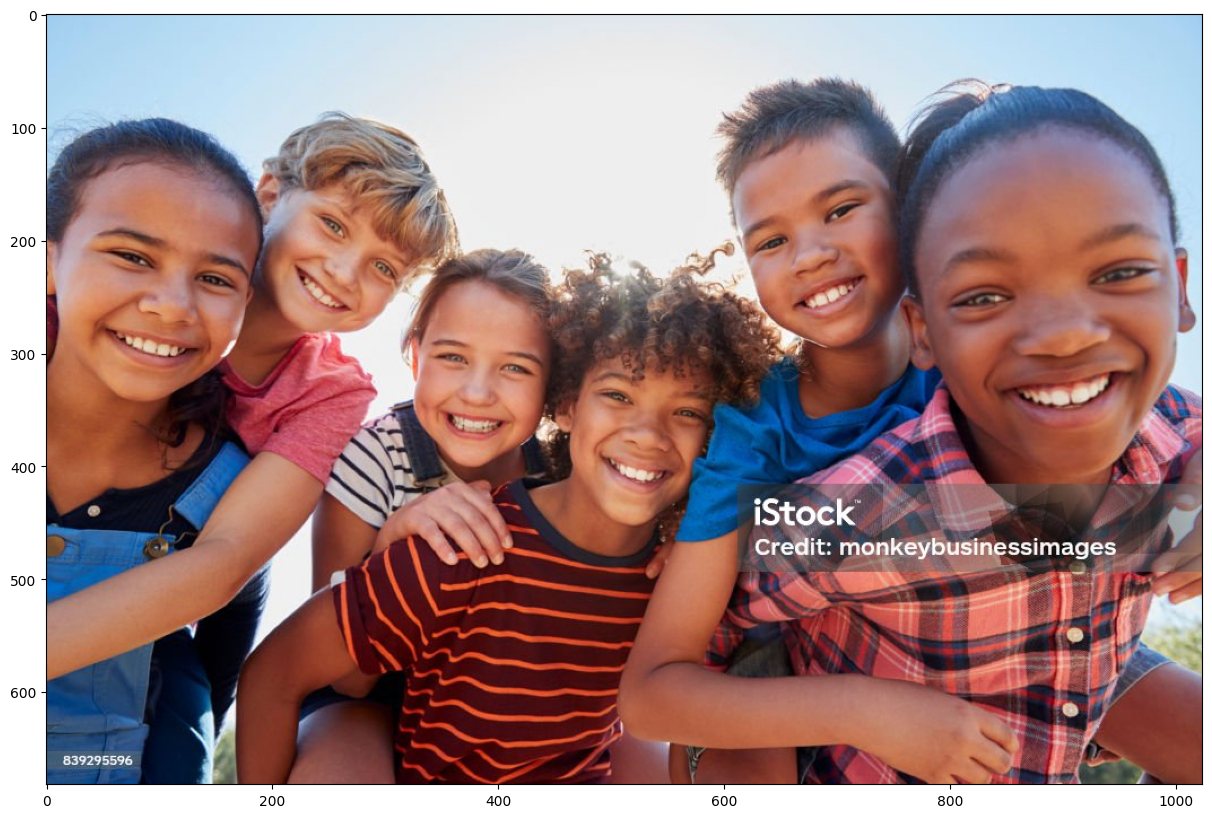

In [21]:
img = cv2.imread('istockphoto-839295596-1024x1024.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

Facial landmarks can be considred as keypoints that define the contours of a face, eyes, nose and mouth. There are many models for facial landmarking, one of the most popular is the 68-point model (https://link.springer.com/article/10.1007/s11554-021-01107-w)

This file shape_predictor_68_face_landmarks.dat is too big ( Size of remote file: 99.7 MB ) I will not push it in my Github repo.

The following is an edit of your code that automatically downloads the bzip2 file, extracts it and sets it as your shape predictor. You can use different .dat files by changing the link of !wget.


In [24]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

!bunzip2 ./shape_predictor_68_face_landmarks.dat.bz2

datFile =  "./shape_predictor_68_face_landmarks.dat"

--2024-03-01 19:59:07--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  25.0MB/s    in 2.4s    

2024-03-01 19:59:10 (25.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bunzip2: Output file ./shape_predictor_68_face_landmarks.dat already exists.


In [27]:
!pwd
!ls -al

/content/CV-HW/lesson_9/data
total 160136
drwxr-xr-x 2 root root     4096 Mar  1 19:59 .
drwxr-xr-x 4 root root     4096 Mar  1 19:13 ..
-rw-r--r-- 1 root root    46287 Mar  1 19:13 eu_summit.jpg
-rw-r--r-- 1 root root      672 Mar  1 19:13 face_template.npy
-rw-r--r-- 1 root root   125926 Mar  1 19:14 istockphoto-839295596-1024x1024.jpg
-rw-r--r-- 1 root root 99693937 Jul 24  2015 shape_predictor_68_face_landmarks.dat
-rw-r--r-- 1 root root 64040097 Jul 24  2015 shape_predictor_68_face_landmarks.dat.bz2
-rw-r--r-- 1 root root    52572 Mar  1 19:13 zelensky.jpg


### Step 3

Run the predictor on your image.



In [30]:
# load the face detector and shape predictor
face_detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

# Detect faces, see http://dlib.net/face_detector.py.html
faces = face_detector(gray)




### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

In [32]:
# Function to draw rectangle around each face
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)



Number of detected faces: 5


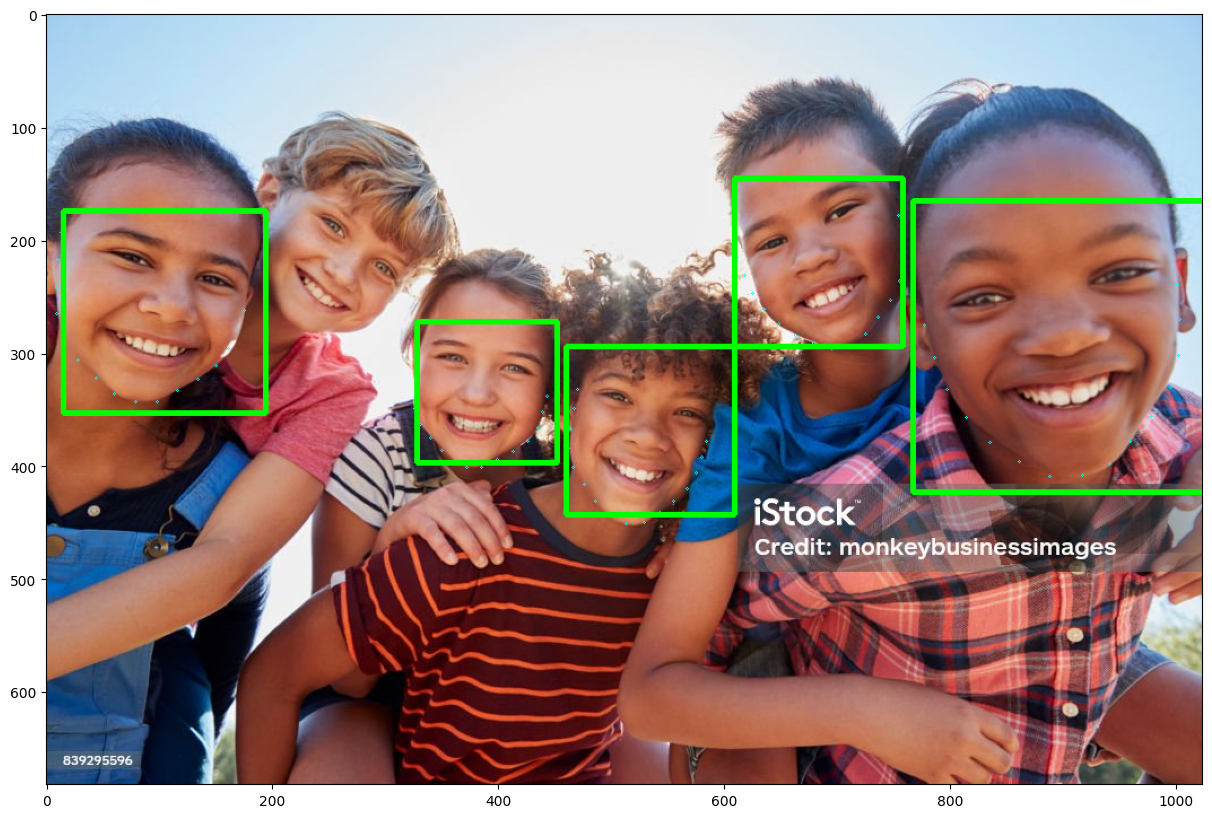

In [33]:
# Draw rectangle around each face
result_img = np.copy(img)
print('Number of detected faces:', len(faces))

for face in faces:
    face_landmarks = predictor(gray, face)

    for n in range(0, 16):
        x_l = face_landmarks.part(n).x
        y_l = face_landmarks.part(n).y
        cv2.circle(result_img, (x_l, y_l), 1, (0, 255, 255), 1)

    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(face)
    cv2.rectangle(result_img, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.imshow(result_img)


### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?